In [52]:
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
ds = pd.read_csv('Pumpkin_Seeds_Dataset.csv')
ds

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,CERCEVELIK
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,CERCEVELIK
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,CERCEVELIK
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,CERCEVELIK
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,CERCEVELIK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,URGUP_SIVRISI
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,URGUP_SIVRISI
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,URGUP_SIVRISI
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,URGUP_SIVRISI


In [54]:
ds.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

In [55]:
df=pd.DataFrame(data=ds)
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,CERCEVELIK
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,CERCEVELIK
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,CERCEVELIK
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,CERCEVELIK
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,CERCEVELIK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,URGUP_SIVRISI
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,URGUP_SIVRISI
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,URGUP_SIVRISI
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,URGUP_SIVRISI


In [56]:
df.shape

(2500, 13)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [58]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [59]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [60]:
df.corr()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
Area,1.000000,0.928548,0.789133,0.685304,0.999806,0.998464,0.159624,0.158388,-0.014018,-0.149378,0.159960,-0.160438
Perimeter,0.928548,1.000000,0.946181,0.392913,0.929971,0.928055,0.464601,0.065340,-0.140600,-0.500968,0.487880,-0.484440
Major_Axis_Length,0.789133,0.946181,1.000000,0.099376,0.789061,0.787078,0.704287,0.119291,-0.214990,-0.684972,0.729156,-0.726958
Minor_Axis_Length,0.685304,0.392913,0.099376,1.000000,0.685634,0.690020,-0.590877,0.090915,0.233576,0.558566,-0.598475,0.603441
Convex_Area,0.999806,0.929971,0.789061,0.685634,1.000000,0.998289,0.159156,0.139178,-0.015449,-0.153615,0.159822,-0.160432
Equiv_Diameter,0.998464,0.928055,0.787078,0.690020,0.998289,1.000000,0.156246,0.159454,-0.010970,-0.145313,0.155762,-0.156411
Eccentricity,0.159624,0.464601,0.704287,-0.590877,0.159156,0.156246,1.000000,0.043991,-0.327316,-0.890651,0.950225,-0.981689
Solidity,0.158388,0.065340,0.119291,0.090915,0.139178,0.159454,0.043991,1.000000,0.067537,0.200836,0.026410,-0.019967
Extent,-0.014018,-0.140600,-0.214990,0.233576,-0.015449,-0.010970,-0.327316,0.067537,1.000000,0.352338,-0.329933,0.336984
Roundness,-0.149378,-0.500968,-0.684972,0.558566,-0.153615,-0.145313,-0.890651,0.200836,0.352338,1.000000,-0.935233,0.933308


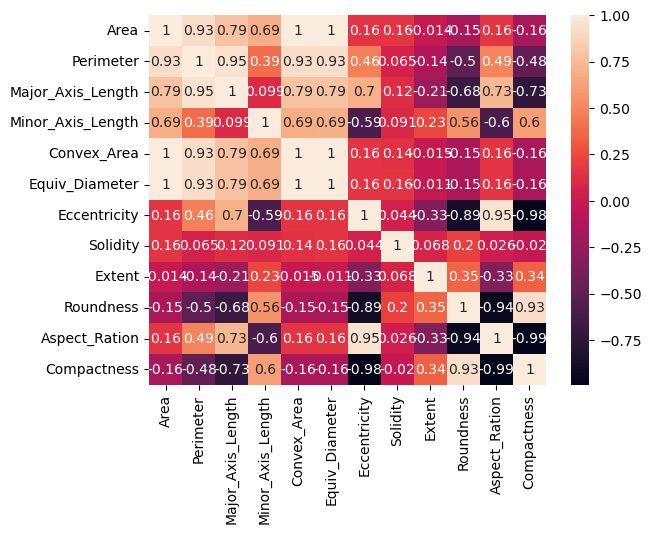

In [61]:
sns.heatmap(df.corr(), annot= True)
plt.show()

C:\Users\Rima Das\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


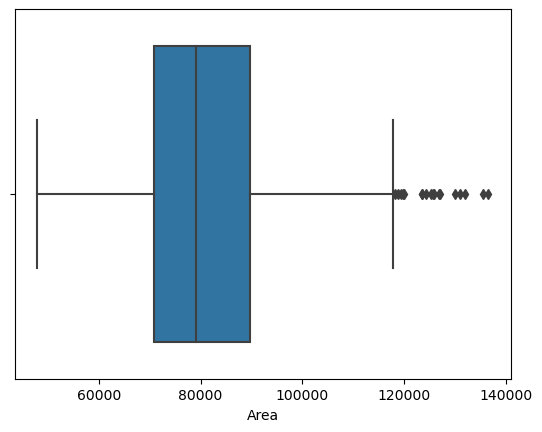

In [62]:
sns.boxplot(df['Area'])
plt.show()

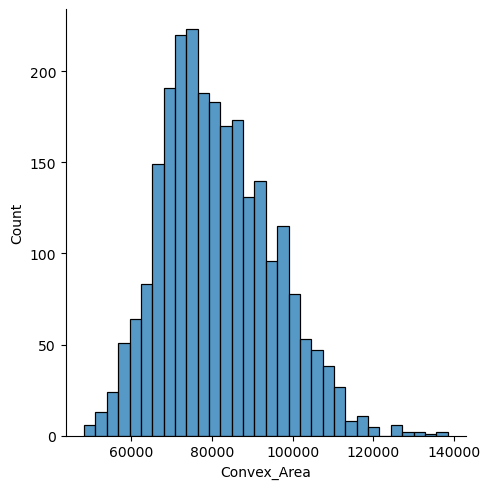

In [63]:
sns.displot(df['Convex_Area'])
plt.show()

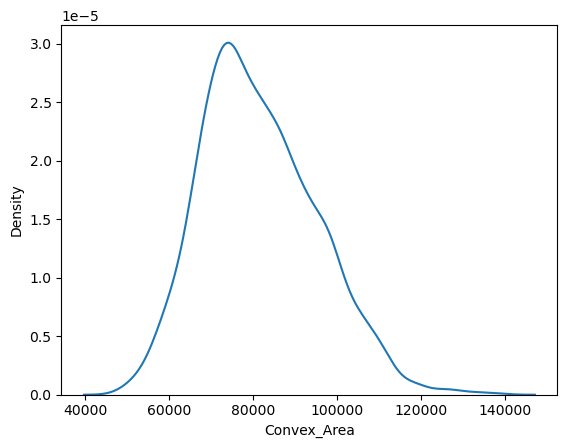

In [64]:
sns.kdeplot(df['Convex_Area'])
plt.show()

C:\Users\Rima Das\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


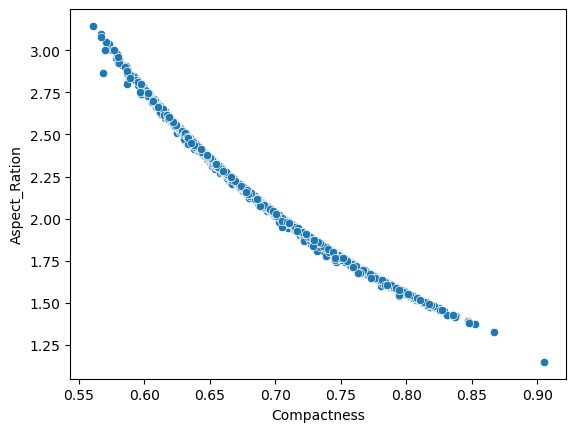

In [65]:
sns.scatterplot(df['Compactness'],df['Aspect_Ration'])
plt.show()

C:\Users\Rima Das\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


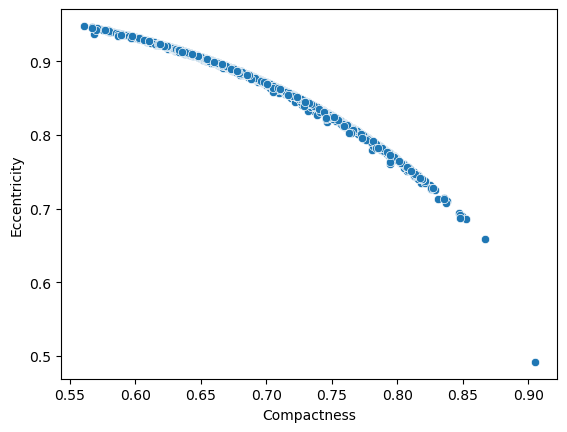

In [66]:
sns.scatterplot(df['Compactness'],df['Eccentricity'])
plt.show()

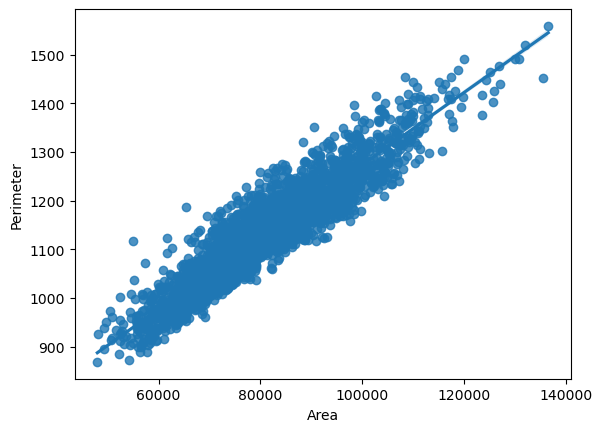

In [67]:
sns.regplot(x='Area', y='Perimeter', data=df)
plt.show()

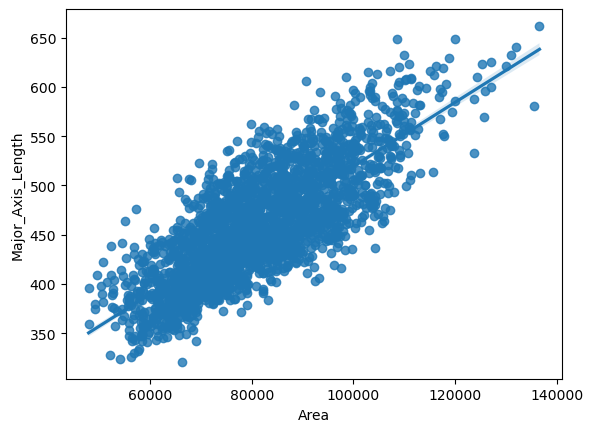

In [68]:
sns.regplot(x='Area', y='Major_Axis_Length', data=df)
plt.show()

In [69]:
df.skew()

C:\Users\Rima Das\AppData\Local\Temp\ipykernel_9684\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Area                 0.495999
Perimeter            0.414539
Major_Axis_Length    0.502980
Minor_Axis_Length    0.104303
Convex_Area          0.494016
Equiv_Diameter       0.271868
Eccentricity        -0.748623
Solidity            -5.691009
Extent              -1.026568
Roundness           -0.372687
Aspect_Ration        0.548231
Compactness         -0.062377
dtype: float64

In [70]:
df.drop('Eccentricity', axis=1, inplace=True)
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.9902,0.7453,0.8963,1.4809,0.8207,CERCEVELIK
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.9916,0.7151,0.8440,1.7811,0.7487,CERCEVELIK
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.9857,0.7400,0.7674,2.0651,0.6929,CERCEVELIK
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.9902,0.7396,0.8486,1.7146,0.7624,CERCEVELIK
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.9850,0.6752,0.8338,1.7413,0.7557,CERCEVELIK
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9907,0.4888,0.6672,2.7996,0.5973,URGUP_SIVRISI
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9919,0.6002,0.7444,2.4134,0.6433,URGUP_SIVRISI
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.9920,0.7643,0.7549,2.2828,0.6599,URGUP_SIVRISI
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9890,0.7374,0.7185,2.4513,0.6359,URGUP_SIVRISI


In [71]:
df.drop('Aspect_Ration', axis=1, inplace=True)
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Solidity,Extent,Roundness,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.9902,0.7453,0.8963,0.8207,CERCEVELIK
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.9916,0.7151,0.8440,0.7487,CERCEVELIK
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.9857,0.7400,0.7674,0.6929,CERCEVELIK
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.9902,0.7396,0.8486,0.7624,CERCEVELIK
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.9850,0.6752,0.8338,0.7557,CERCEVELIK
...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9907,0.4888,0.6672,0.5973,URGUP_SIVRISI
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9919,0.6002,0.7444,0.6433,URGUP_SIVRISI
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.9920,0.7643,0.7549,0.6599,URGUP_SIVRISI
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9890,0.7374,0.7185,0.6359,URGUP_SIVRISI


In [72]:
df.skew()

C:\Users\Rima Das\AppData\Local\Temp\ipykernel_9684\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Area                 0.495999
Perimeter            0.414539
Major_Axis_Length    0.502980
Minor_Axis_Length    0.104303
Convex_Area          0.494016
Equiv_Diameter       0.271868
Solidity            -5.691009
Extent              -1.026568
Roundness           -0.372687
Compactness         -0.062377
dtype: float64

In [73]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [74]:
df['Class']= le.fit_transform(df['Class'])
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Solidity,Extent,Roundness,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.9902,0.7453,0.8963,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.9916,0.7151,0.8440,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.9857,0.7400,0.7674,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.9902,0.7396,0.8486,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.9850,0.6752,0.8338,0.7557,0
...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9907,0.4888,0.6672,0.5973,1
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9919,0.6002,0.7444,0.6433,1
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.9920,0.7643,0.7549,0.6599,1
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9890,0.7374,0.7185,0.6359,1


In [75]:
x= df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=45)

In [77]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [78]:
pred = gnb.predict(x_test)
pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,

In [79]:
accuracy_score(y_test, pred)

0.7373333333333333

In [80]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [81]:
pr = lg.predict(x_test)
pr

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,

In [82]:
accuracy_score(y_test,pr)

0.876

In [84]:
import numpy as np

p = np.array([69647, 1084.318, 462.9416, 191.8210, 70216, 297.7874, 0.9919, 0.6002, 0.7444, 0.6433])

In [85]:
p.shape

(10,)

In [86]:
p = p.reshape(1,-1)
p

array([[6.964700e+04, 1.084318e+03, 4.629416e+02, 1.918210e+02,
        7.021600e+04, 2.977874e+02, 9.919000e-01, 6.002000e-01,
        7.444000e-01, 6.433000e-01]])

In [87]:
p.shape

(1, 10)

In [88]:
lg.predict(p)

C:\Users\Rima Das\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [89]:
if lg.predict(p)==0:
    print('CERCEVELIK')
else:
    print('URGUP_SIVRISI')

URGUP_SIVRISI


C:\Users\Rima Das\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
